In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tranh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tranh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tranh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# Đọc file gốc
df_raw = pd.read_csv("../data_use/bbc_text_cls.csv")

# Kiểm tra nhanh
print(df_raw.info())
print(df_raw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None
                                                text    labels
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business


In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # bỏ URL
    text = text.translate(str.maketrans('', '', string.punctuation))  # bỏ dấu câu
    text = re.sub(r'\s+', ' ', text).strip()             # bỏ khoảng trắng thừa
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [4]:
# Sao chép để clean mà không làm thay đổi bản gốc
df_clean = df_raw.copy()

# Áp dụng cleaning
df_clean['text'] = df_clean['text'].apply(clean_text)

# Lưu bản sạch
df_clean.to_csv("../data_use/bbc_text_cls_clean.csv", index=False)
print("Đã tạo file cleaned: bbc_text_cls_clean.csv")


Đã tạo file cleaned: bbc_text_cls_clean.csv


C:\Users\tranh\AppData\Local\Temp\ipykernel_36376\3511064608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x='count', y='word', palette='coolwarm')


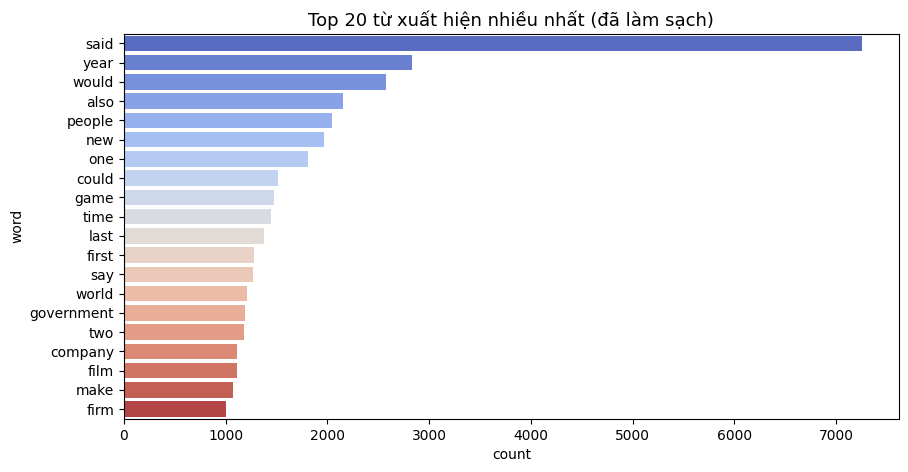

In [12]:

from collections import Counter

def get_top_words(texts, n=20):
    words = re.findall(r'\b[a-zA-Z]{3,}\b', " ".join(texts).lower())
    common = Counter(words).most_common(n)
    return pd.DataFrame(common, columns=['word', 'count'])

top_words = get_top_words(df_clean['text'])
plt.figure(figsize=(10,5))
sns.barplot(data=top_words, x='count', y='word', palette='coolwarm')
plt.title("Top 20 từ xuất hiện nhiều nhất (đã làm sạch)", fontsize=13)
plt.show()


In [5]:
# Tính độ dài tạm thời mà không thêm cột vào df
raw_lengths = df_raw['text'].apply(lambda x: len(x.split()))
clean_lengths = df_clean['text'].apply(lambda x: len(x.split()))


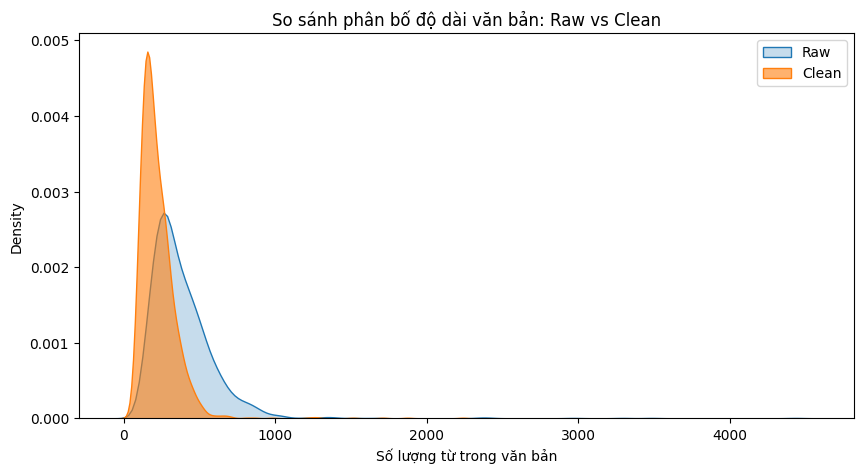

In [6]:
plt.figure(figsize=(10,5))
sns.kdeplot(raw_lengths, label='Raw', fill=True)
sns.kdeplot(clean_lengths, label='Clean', fill=True, alpha=0.6)
plt.title("So sánh phân bố độ dài văn bản: Raw vs Clean")
plt.xlabel("Số lượng từ trong văn bản")
plt.legend()
plt.show()


C:\Users\tranh\AppData\Local\Temp\ipykernel_36376\532614888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='labels', y='text_length', palette='Set2')


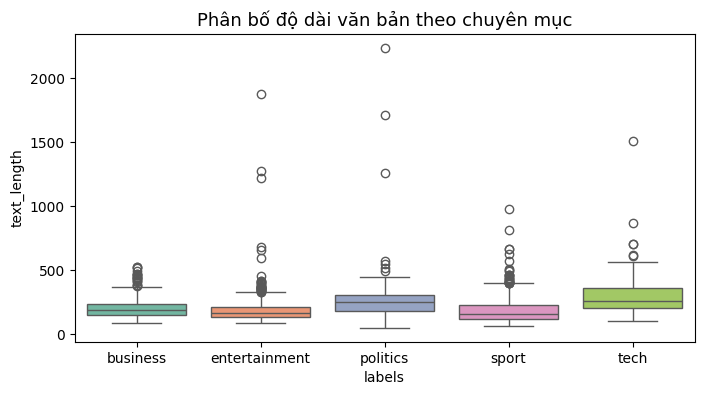


Thống kê độ dài văn bản:
               count        mean         std    min    25%    50%    75%  \
labels                                                                     
business       510.0  199.680392   78.427559   83.0  146.0  184.0  236.0   
entertainment  386.0  196.476684  140.287629   87.0  136.0  162.0  214.0   
politics       417.0  256.800959  154.738415   49.0  180.0  253.0  302.0   
sport          511.0  186.861057  106.577645   64.0  117.5  157.0  229.5   
tech           401.0  288.326683  126.376226  100.0  204.0  261.0  357.0   

                  max  
labels                 
business        521.0  
entertainment  1874.0  
politics       2237.0  
sport           978.0  
tech           1512.0  


In [9]:

df_clean['text_length'] = df_clean['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.boxplot(data=df_clean, x='labels', y='text_length', palette='Set2')
plt.title("Phân bố độ dài văn bản theo chuyên mục", fontsize=13)
plt.show()

print("\nThống kê độ dài văn bản:")
print(df_clean.groupby('labels')['text_length'].describe())



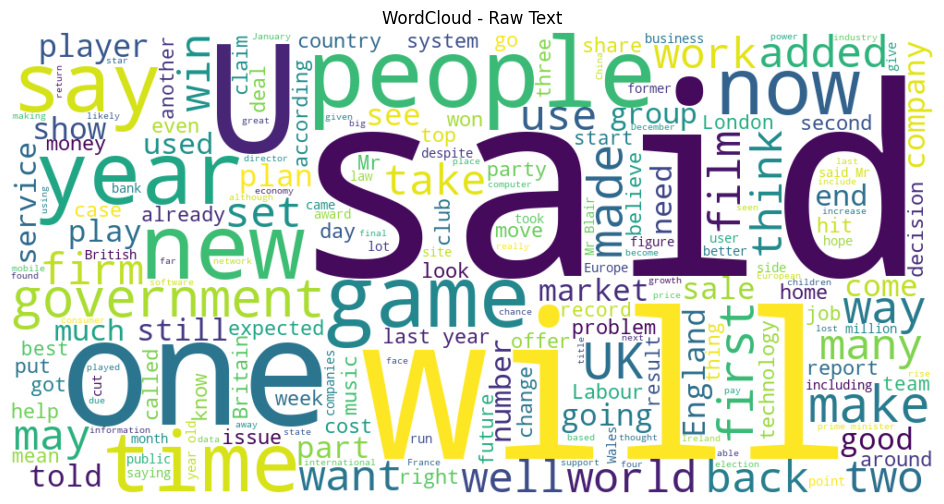

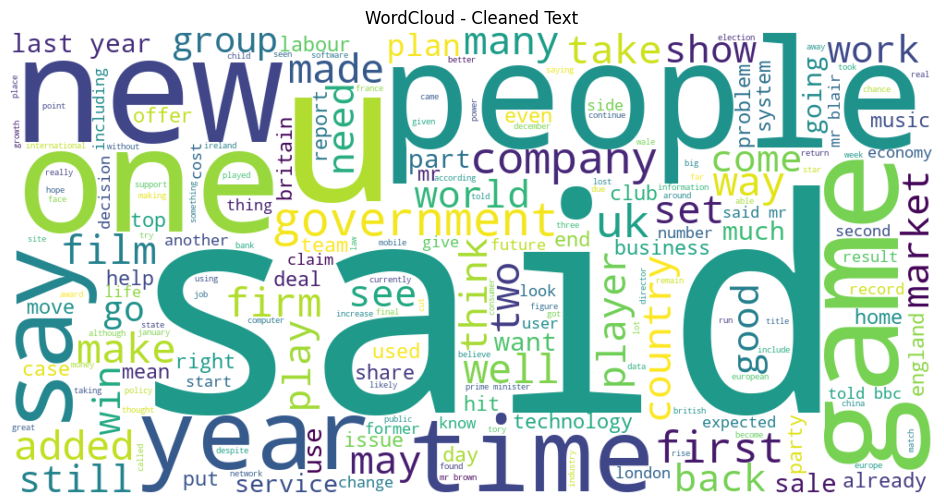

In [7]:
def plot_wordcloud(data, title):
    text = ' '.join(data)
    wc = WordCloud(width=1000, height=500, background_color='white').generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df_raw['text'], "WordCloud - Raw Text")
plot_wordcloud(df_clean['text'], "WordCloud - Cleaned Text")
